In [25]:
import pickle
import numpy as np

class CaptchaSolver:
    rects = []
    kmeans1 = None
    groups1 = None
    kmeans2 = None
    groups2 = None
    kmeans3 = None
    groups3 = None
    kmeans4 = None
    groups4 = None
    def predict( self, im ):
        display(im)
        def predictdigit( di, kmeans, groups ) :
            display(di)
            return groups[kmeans.predict( [np.array(di.convert("L").getdata()) ] )[0]]
        result =  predictdigit( im.copy().crop(self.rects[0]), self.kmeans1, self.groups1 )
        result += predictdigit( im.copy().crop(self.rects[1]), self.kmeans2, self.groups2 )
        result += predictdigit( im.copy().crop(self.rects[2]), self.kmeans3, self.groups3 )
        result += predictdigit( im.copy().crop(self.rects[3]), self.kmeans4, self.groups4 )
        return result

solver = pickle.load( open( "solver.p", "rb" ) )

In [26]:
import os
from PIL import Image

dirname = "data"
ims = []
filenames = []
for filename in os.listdir(dirname) :
    filenames.append(filename)
    fullname = os.path.join(dirname, filename)
    #print(fullname)
    im = Image.open(fullname)
    #display(im)
    ims.append(im)
print("images : " + str(len(ims)))

images : 298


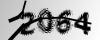

'2064'

In [27]:
solver.predict( ims[-1] )
